In [28]:
import os
import cv2
import numpy as np
from tensorflow.keras import models, layers

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

def unet(input_shape=(256, 256, 3)):
    inputs = layers.Input(shape=input_shape)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    up1 = layers.UpSampling2D(size=(2, 2))(conv3)
    concat1 = layers.concatenate([up1, conv2])
    conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat1)
    conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

    up2 = layers.UpSampling2D(size=(2, 2))(conv4)
    concat2 = layers.concatenate([up2, conv1])
    conv5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(concat2)
    conv5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(conv5)  # For RGB output

    model = Model(inputs, outputs)
    return model

cnn_model = unet()
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
def load_images_input(directory, target_size=(256, 256)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Could not read image {filename}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)

            images.append(img)
    return np.array(images)

def load_images_output(directory, target_size=(256, 256)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Could not read image {filename}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)
            images.append(img)
    return np.array(images)

In [ ]:
io_dir = '/content/drive/MyDrive/Data-Photos'
op_dir = '/content/drive/MyDrive/Final-Photos'

input_images = load_images_input(io_dir)
output_images = load_images_output(op_dir)


In [ ]:
import tensorflow as tf
cnn_model.fit(input_images / 255.0, output_images / 255.0, epochs=50, batch_size=16, validation_split=0.1)
cnn_model.save('cnn_model.h5')

In [ ]:
def load_image(file_path, target_size=(256, 256)):
    if not file_path.endswith('.png'):
        raise ValueError("File must be a PNG image")

    img = cv2.imread(file_path)
    if img is None:
        print(f"Could not read image {file_path}")
        return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)

    # Add a batch dimension
    img = np.expand_dims(img, axis=0)  # Shape: (1, 256, 256, 3)

    return img

def save_images(predictions, output_directory, original_filenames):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)  # Create the directory if it doesn't exist

    for filename, prediction in zip(original_filenames, predictions):
        # Ensure the filename has a .png extension
        if not filename.endswith('.png'):
            filename += '.png'  # Append .png if not present

        output_path = os.path.join(output_directory, filename)

        # Save the prediction as a PNG image
        if prediction is not None:
            cv2.imwrite(output_path, cv2.cvtColor(prediction, cv2.COLOR_RGB2BGR))  # Convert RGB to BGR for saving
        else:
            print(f"Prediction for {filename} is None.")

1/1 [==============================] - 0s 417ms/step


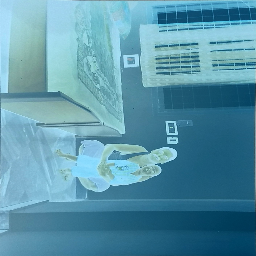

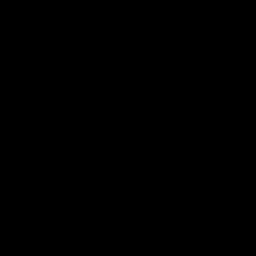

In [31]:

import numpy as np
import os
from google.colab.patches import cv2_imshow
# Load the model
reloaded_model = tf.keras.models.load_model('/content/cnn_model.h5')

# Load new images
new_input_images =  load_image("/content/drive/MyDrive/Final-Photos/2019_01_12 11_33 Office Lens.png")
new_output_predictions = reloaded_model.predict(new_input_images / 255.0)

input_image = new_input_images.squeeze()  # Shape: (256, 256, 3)
output_image = new_output_predictions.squeeze()  # Shape: (256, 256, 3)

# Display the images
cv2_imshow(input_image)  # Display input image
cv2_imshow(output_image)  # Display output predictions
